In [406]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [407]:
img = cv2.imread('./test_image/Cersie_lannister12.jpg')
img.shape

(702, 1248, 3)

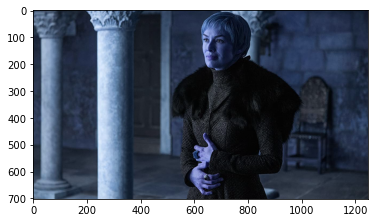

In [408]:
plt.imshow(img)

In [409]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(702, 1248)

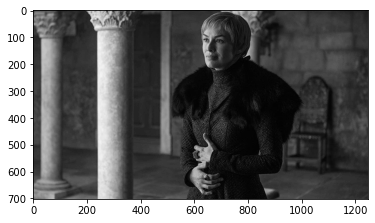

In [410]:
plt.imshow(gray , cmap='gray')

In [411]:
gray

array([[ 72,  72,  70, ...,  27,  27,  27],
       [ 75,  74,  73, ...,  28,  28,  28],
       [ 78,  77,  76, ...,  28,  28,  28],
       ...,
       [107, 107, 107, ...,  42,  42,  42],
       [102, 101, 100, ...,  43,  43,  43],
       [ 94,  91,  90, ...,  43,  43,  43]], dtype=uint8)

In [412]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[605,  65, 121, 121]])

In [413]:
(x,y,w,h) = faces[0]
x,y,w,h

(605, 65, 121, 121)

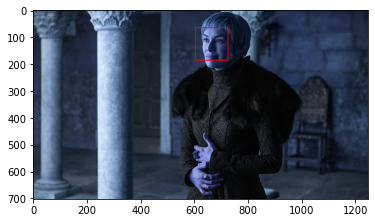

In [414]:
face_img  = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

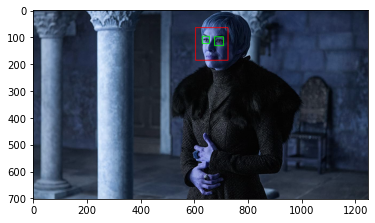

In [415]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

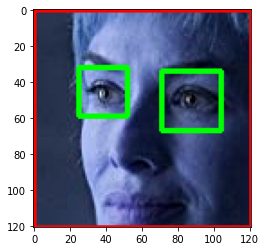

In [416]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [417]:
#def get_cropped_image_if_2_eyes(image_path):
    #img = cv2.imread(image_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #for (x,y,w,h) in faces:
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]
        #eyes = eye_cascade.detectMultiScale(roi_gray)
        #if len(eyes) >= 2:
            #return roi_color

In [418]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

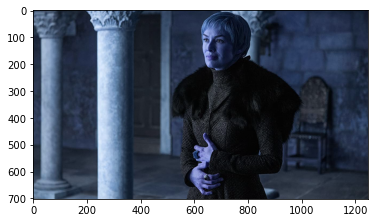

In [419]:
original_image = cv2.imread('./test_image/Cersie_lannister12.jpg')
plt.imshow(original_image)

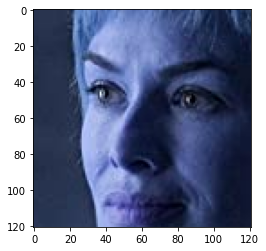

In [420]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/Cersie_lannister12.jpg')
plt.imshow(cropped_image)

In [421]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [422]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [423]:
img_dirs

['./dataset/Cersie_lannister',
 './dataset/cropped',
 './dataset/Daenerys',
 './dataset/Jaime_lannister',
 './dataset/Jon_snow',
 './dataset/Sansa_strak']

In [424]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

PermissionError: [WinError 5] Access is denied: './dataset/cropped/'

In [425]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cersie_lannister
Generating cropped images in folder:  ./dataset/cropped/Cersie_lannister
cropped
Daenerys
Generating cropped images in folder:  ./dataset/cropped/Daenerys
Jaime_lannister
Generating cropped images in folder:  ./dataset/cropped/Jaime_lannister
Jon_snow
Generating cropped images in folder:  ./dataset/cropped/Jon_snow
Sansa_strak
Generating cropped images in folder:  ./dataset/cropped/Sansa_strak


In [431]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [432]:
img = cv2.imread('./test_image/Cersie_lannister12.jpg')
img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(702, 1248)

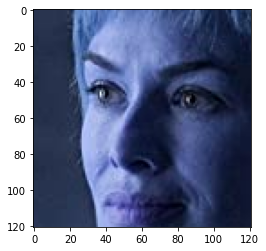

In [433]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/Cersie_lannister12.jpg')
plt.imshow(cropped_image)

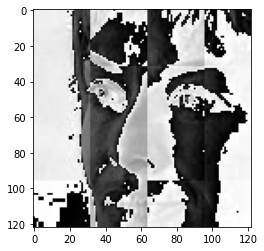

In [436]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [489]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cersie_lannister': ['./dataset/cropped/Cersie_lannister\\Cersie_lannister1.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister10.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister11.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister12.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister13.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister14.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister15.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister16.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister17.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister18.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister19.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister2.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister20.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister21.png',
  './dataset/cropped/Cersie_lannister\\Cersie_lannister22.png',
  './dataset/cropped/C

In [490]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cersie_lannister': 0,
 'Daenerys': 1,
 'Jaime_lannister': 2,
 'Jon_snow': 3,
 'Sansa_strak': 4}

In [491]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [492]:
len(X)

313

In [493]:
x = np.array(X).reshape(len(X),4096).astype(float)
x.shape

(313, 4096)

In [494]:
x[0]

array([ 92., 138., 189., ...,  45., 225., 248.])

In [495]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [496]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [497]:
len(X_train)

234

In [498]:
len(X_test)

79

In [499]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7468354430379747

In [501]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.76      0.76      0.76        17
           2       0.92      1.00      0.96        11
           3       1.00      0.57      0.73        14
           4       0.52      0.88      0.65        16

    accuracy                           0.75        79
   macro avg       0.81      0.77      0.76        79
weighted avg       0.80      0.75      0.75        79



In [502]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [503]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [504]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.777336,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.563830,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.786031,{'logisticregression__C': 5}


In [508]:
best_estimators['svm'].score(X_test,y_test)

0.8227848101265823

In [509]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7974683544303798

In [510]:
best_estimators['random_forest'].score(X_test,y_test)

0.5822784810126582

In [512]:
best_clf = best_estimators['svm']

In [513]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  0,  0,  1,  3],
       [ 4, 12,  0,  0,  1],
       [ 0,  0, 11,  0,  0],
       [ 1,  0,  0, 12,  1],
       [ 2,  1,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

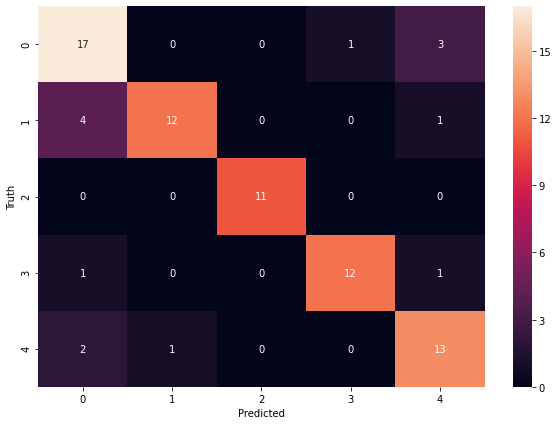

In [514]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [515]:
class_dict

{'Cersie_lannister': 0,
 'Daenerys': 1,
 'Jaime_lannister': 2,
 'Jon_snow': 3,
 'Sansa_strak': 4}

In [516]:
!pip install joblib

In [517]:
import joblib

In [518]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [519]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))